# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [1]:
id1 = "206239568"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Q1 

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

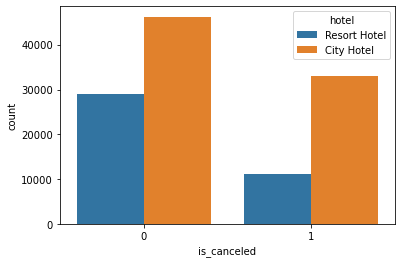

In [31]:
df_1 = data[["is_canceled","hotel"]]
sns.countplot(data=df_1,x="is_canceled",hue="hotel")

 # Q2

In [34]:
df_2 = data[["hotel","children","arrival_date_year"]]
pd.pivot_table(data=df_2, values="children", columns="arrival_date_year", index="hotel")

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,0.037432,0.100000,0.106224
Resort Hotel,0.101636,0.112781,0.168146


# Q3

<AxesSubplot:xlabel='customer_type', ylabel='stays_in_week_nights'>

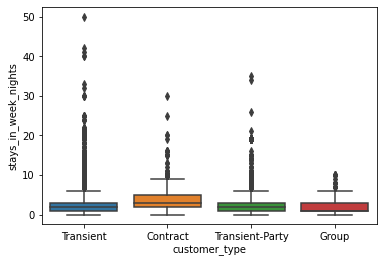

In [47]:
df_3 = data[["customer_type","stays_in_week_nights"]]
sns.boxplot(data=df_3,x="customer_type",y="stays_in_week_nights")

# Q4

In [53]:
df_4 = data.loc[(data.is_canceled==0)]
df_4 = df_4[(df_4.children>0)]
print("The length of the new dataframe is "+str(len(df_4)))
df_4.head()

The length of the new dataframe is 5464


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,No Deposit,241.0,NaN,0,Transient,154.77,0,1,Check-Out,2015-07-05
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,No Deposit,NaN,NaN,0,Transient,107.00,1,2,Check-Out,2015-07-03
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,2015-07-05
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,No Deposit,240.0,NaN,0,Transient,99.30,1,2,Check-Out,2015-07-10
102,Resort Hotel,0,92,2015,July,27,4,2,4,1,...,No Deposit,241.0,NaN,0,Transient,96.49,0,2,Check-Out,2015-07-10


# Q5

<AxesSubplot:xlabel='is_repeated_guest', ylabel='previous_bookings_not_canceled'>

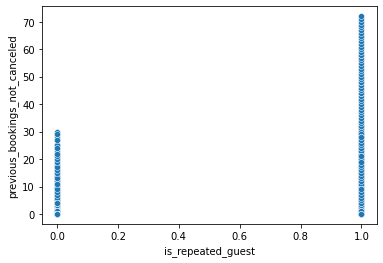

In [72]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights','customer_type', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time', 'is_canceled' ]

data_corr = data[features].corr(method="spearman")
data_corr_unstacked = data_corr.unstack().sort_values()
data_corr_unstacked[-14:-10]

df_5 = data[["previous_bookings_not_canceled","is_repeated_guest"]]
sns.scatterplot(data=data,x="is_repeated_guest",y="previous_bookings_not_canceled")

# Q6

In [74]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time']





# data_dummies = pd.get_dummies(data['customer_type'])
# data = pd.concat([data, data_dummies], axis=1)
# data.drop(["customer_type"],axis=1,inplace=True)
# features.remove('customer_type')


x = data[features]
y = data['is_canceled']

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")
model1 = model1.fit(x_train,y_train)

prediction1 = model1.predict(x_test)

acc = sk.metrics.accuracy_score(prediction1, y_test)*100
print("The accuracy of the prediction is "+str(acc)+" precent")

The accuracy of the prediction is 76.14819778317559 precent


In [78]:
# data["is_canceled"].value_counts().plot.pie(autopct='%1.0f%%')

76% יותר טוב מדיוק מקרי.

---
# GOOD LUCK !!!!
---

In [9]:
# do not type below this line